maptiles
===========
Create map images and use as plot background.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Illustrative examples

### Map image on matplotlib axes

- `draw_map((lon1, lat1, lon2, lat2))` draws map image of the specified rectangle behind the matplotlib axes.
- Visualizations can be added further using the matplotlib features

**Remarks:**

- Longitude and latitudes must be given in angles. Internally longitudes are converted to `[-180 to 180)` scale. Latitudes must be in `[-L, L]` with `L=85.0511287798`. This `L` is the north and south limit of Web Mercator projection.
- Zoom level is automatically chosen by heuristic calculation. The `z` option allows for explicit specification.
- Aspect ratio is automatically adjusted by heuristic calculation. The `aspect` option allows for explicit specification.
- If `ax` is not given, then a new axes is created internally.
- The axes will be scaled by Web Mercator formula comaptible with the image.

Zoom level 18 is chosen


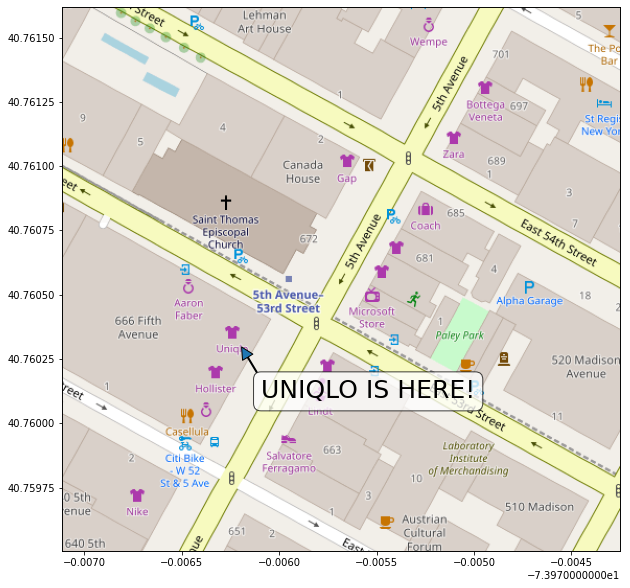

In [2]:
from maptiles import draw_map

# 5th Avenue in Manhattan, New York
bounds = [286.02288365364075, 40.761816905893156, 286.0257428884506, 40.7593098808893]
fig, ax = plt.subplots(figsize=(10, 10))
draw_map(bounds, ax=ax)

uniqlo = [286.02380633354187, 40.76029726182907]
uniqlo[0] -= 360
arrow_from = uniqlo[0] + 0.0001, uniqlo[1] - 0.0002
ax.annotate("UNIQLO IS HERE!", uniqlo, xytext=arrow_from, fontsize=25,
            bbox={"facecolor": "white", "alpha":0.75, "boxstyle":"round"}, arrowprops={"width":1})
None

Zoom level 17 is chosen


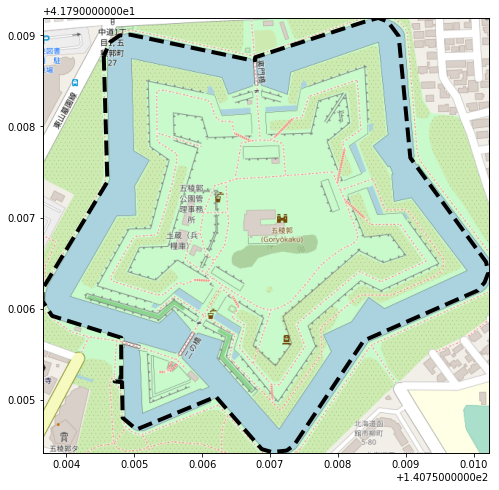

In [3]:
# Goryokaku Castle in Hokkaido, Japan
goryokaku = [[140.7545506954193, 41.79877552882002], [140.7546043395996, 41.797391817910004], [140.7536494731903, 41.7962160400744],
             [140.7536494731903, 41.79608006437536], [140.75378894805905, 41.79592009259535], [140.75480818748474, 41.79568013417667],
             [140.75480818748474, 41.79524020807576], [140.75473308563232, 41.79524820675909], [140.7547116279602, 41.79520021464413],
             [140.7548189163208, 41.79519221595479], [140.75482964515686, 41.7948002789552], [140.755033493042, 41.79467229900768],
             [140.75620293617249, 41.79503224195874], [140.75687885284424, 41.794456332266776], [140.75702905654907, 41.79442433713216],
             [140.75724363327026, 41.79444033470147], [140.75735092163086, 41.79449632616259], [140.75838088989255, 41.795648139652975],
             [140.76006531715393, 41.79620004294831], [140.76016187667847, 41.796288027092395], [140.76021552085876, 41.79639200819787],
             [140.7601833343506, 41.79651198618687], [140.75906753540036, 41.7976557650716], [140.75889587402344, 41.79899148100668],
             [140.75873494148254, 41.79915144512023], [140.75859546661377, 41.79919143608624], [140.7584023475647, 41.79915144512023],
             [140.7567822933197, 41.798759532332795], [140.7567822933197, 41.79872753934637], [140.75671792030334, 41.79872753934637],
             [140.75493693351746, 41.79900747743603], [140.75478672981262, 41.79899947922184], [140.75464725494385, 41.798927495249465],
             [140.7545506954193, 41.79877552882002]]
lons, lats = zip(*goryokaku)
bounds = min(lons), max(lats), max(lons), min(lats)
fig, ax = plt.subplots(figsize=(8, 8))
draw_map(bounds, ax=ax)

ax.plot(lons, lats, c="black", linewidth=4, linestyle="dashed")
None

Zoom level 15 is chosen


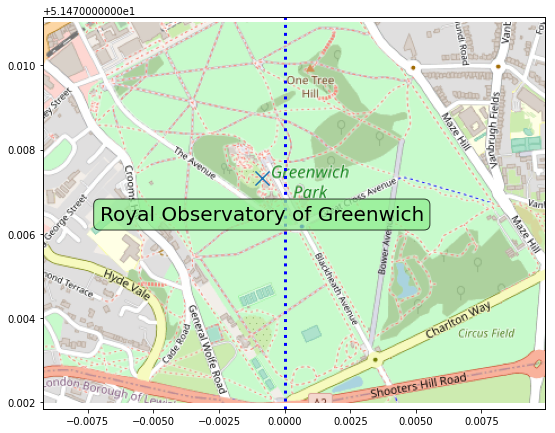

In [4]:
# Royal observatory of Greenwich
bounds = (-0.0092, 51.481, 0.0099, 51.472)
fig, ax = plt.subplots(figsize=(9, 7.2))
draw_map(bounds, ax=ax)

observatory = (-0.0008717179298400879, 51.47732699342673)
ax.scatter(*observatory, marker="x", s=200)
ax.axvline(x=0, linestyle="dotted", linewidth=3, c="blue")
ax.text(observatory[0], observatory[1]-0.001, "Royal Observatory of Greenwich", ha="center",
        fontsize=20, bbox={"facecolor":"lightgreen", "alpha":0.75, "boxstyle":"round"})
None

## Obtain the image data as array

- `get_maparray((lon1, lat1, lon2, lat2))` returns:
    - The RGB image data as numpy array of shape (height, height, 3).
    - Tuple of `(xmin, xmax, ymin, ymax)` defining the area covered by the image.

(338, 446, 3)
(-0.009226799011230469, 0.009913444519042969, 51.47197425351905, 51.48100872578421)


Zoom level 15 is chosen


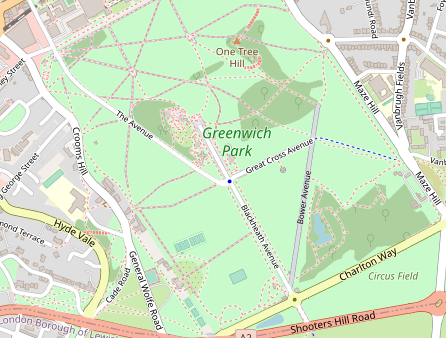

In [5]:
from maptiles import get_maparray
# Royal observatory of Greenwich, again
bounds = (-0.0092, 51.481, 0.0099, 51.472)
img, extent = get_maparray(bounds)

print(img.shape)
print(extent)

Image.fromarray(img)

## Tiles

### Predefined tiles

- This package defines a number of map tiles for the convenience.
- The available tiles are given by the `predefined_tiles` function.
- `get_tile` function returns the predefined tile object (a named tuple).
- The `tile` option of `draw_map` and `get_maparray` accepts one of:
    - Names of predefined tiles.
    - URL string with `{z}`, `{x}`, `{y}` format parameters.
    - Tile object.

In [6]:
from maptiles import predefined_tiles, get_tile

list(predefined_tiles().keys())
get_tile("osm")

Tile(name='OpenStreetMap, Standard', baseurl='https://tile.openstreetmap.org/{z}/{x}/{y}.png', copyright='© OpenStreetMap contributors', copywright_html='&copy; <a href="http://openstreetmap.org">OpenStreetMap</a> contributors')

Zoom level 15 is chosen
Zoom level 15 is chosen


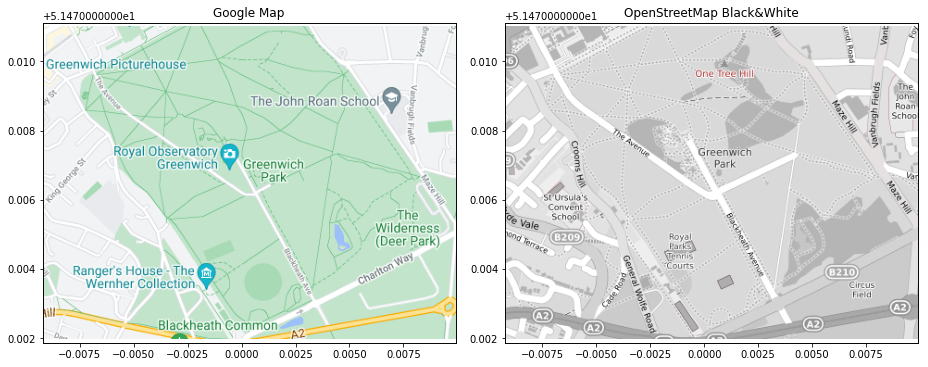

In [7]:
# Royal observatory of Greenwich, again
bounds = (-0.0092, 51.481, 0.0099, 51.472)
fig, ax = plt.subplots(1, 2, figsize=(13, 5.2))
draw_map(bounds, ax=ax[0], tile="google")   # tile name
ax[0].set_title("Google Map")

draw_map(bounds, ax=ax[1], tile=get_tile("osm_bw")) # tile object
ax[1].set_title("OpenStreetMap Black&White")
fig.tight_layout()
None

### Copyrights of the map tiles

- This package only provides an interface to access and parse data from map tile servers.
- The map data belong to the providers and they shall be used in compliant with their term of usage.
- Examples of copyright messages are given for predefined tiles (Note: not official one).
- Use `get_tile` function to use them.

In [8]:
from IPython.core.display import HTML

tile = get_tile("osm")
print(tile.copyright)
display(HTML(tile.copywright_html))

tile = get_tile("japangsi")
print(tile.copyright)
display(HTML(tile.copywright_html))

tile = get_tile("google")
print(tile.copyright)
display(HTML(tile.copywright_html))

© OpenStreetMap contributors


© 国土地理院 | Geospatial Information Authority of Japan


© Google


Zoom level 3 is chosen


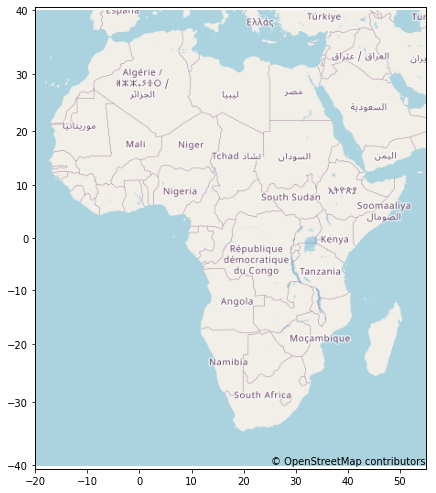

In [9]:
# Add copyright message to the plot
bounds = [-20, 40, 55, -40]
tile = get_tile("osm")
fig, ax = plt.subplots(figsize=(7, 8.5))
draw_map(bounds, ax=ax, tile=tile)
bottom, right = ax.get_ylim()[0], ax.get_xlim()[1]
ax.text(right, bottom, tile.copyright, ha="right", va="bottom")
None

### Custom tiles

- Any tile following the OSM's naming rule can be specified by a URL string with `{x}`, `{y}`, `{z}` parameters.
- Alternatively, a tile object can be created with the `Tile` function.

Zoom level 11 is chosen
Zoom level 11 is chosen


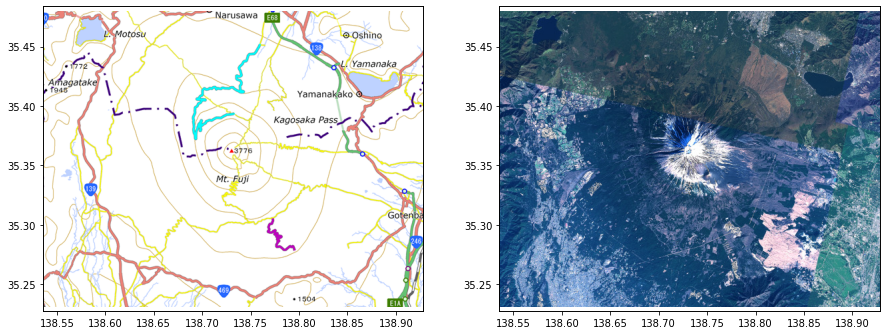

In [10]:
from maptiles import Tile

# Mount Fuji, Japan
bounds = [138.53553771972656, 35.48024245154482, 138.9276123046875, 35.231598543453316]
fig, ax = plt.subplots(1, 2, figsize=(15, 5.6))

draw_map(bounds, ax=ax[0], tile="https://cyberjapandata.gsi.go.jp/xyz/english/{z}/{x}/{y}.png")
draw_map(bounds, ax=ax[1], tile=Tile("https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg"))
None

## Implementation details

### Database

- Downloaded image data are stored at the internal SQLite database at `config.dbfile`. The default location is `~/maptiles.db`.
- By reusing the stored images, we reduce the number of requests to the map tile servers.
- If you want to delete existing data, either run `initialize_database(replace=True)` or simply delete the file.
- One may change the database file location by the `set_databasefile` function.

In [11]:
import sqlite3
from maptiles import config, set_databasefile

# The database has only one table "tiles"
#   with columns "url" and "image".
with sqlite3.connect(config.dbfile) as conn:
    c = conn.cursor()
    data = c.execute("SELECT url FROM tiles LIMIT 10").fetchall()
print(data)

[('http://tiles.wmflabs.org/bw-mapnik/15/16383/10900.png',), ('http://tiles.wmflabs.org/bw-mapnik/15/16383/10901.png',), ('http://tiles.wmflabs.org/bw-mapnik/15/16384/10900.png',), ('http://tiles.wmflabs.org/bw-mapnik/15/16384/10901.png',), ('https://cyberjapandata.gsi.go.jp/xyz/english/11/1812/807.png',), ('https://cyberjapandata.gsi.go.jp/xyz/english/11/1812/808.png',), ('https://cyberjapandata.gsi.go.jp/xyz/english/11/1812/809.png',), ('https://cyberjapandata.gsi.go.jp/xyz/english/11/1813/807.png',), ('https://cyberjapandata.gsi.go.jp/xyz/english/11/1813/808.png',), ('https://cyberjapandata.gsi.go.jp/xyz/english/11/1813/809.png',)]


In [12]:
# Change the database location
set_databasefile("./temp.db")
print(config.dbfile)

./temp.db
